<a href="https://colab.research.google.com/github/Belisabeth/corona_py_analysis/blob/master/Kit_Starter_Construction_Illegale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BDOrtho

https://geoservices.ign.fr/bdortho

In [ ]:
!wget https://assets-datascientest.s3.eu-west-1.amazonaws.com/datasets/Illegal_Construction_+93.zip
!unzip -q "Illegal_Construction_+93.zip"

--2024-02-20 12:43:43--  https://assets-datascientest.s3.eu-west-1.amazonaws.com/datasets/Illegal_Construction_+93.zip
Resolving assets-datascientest.s3.eu-west-1.amazonaws.com (assets-datascientest.s3.eu-west-1.amazonaws.com)... 52.218.122.130, 3.5.69.184, 52.218.45.42, ...
Connecting to assets-datascientest.s3.eu-west-1.amazonaws.com (assets-datascientest.s3.eu-west-1.amazonaws.com)|52.218.122.130|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2634647873 (2.5G) [application/zip]
Saving to: ‘Illegal_Construction_+93.zip’

Illegal_Constructio 100%[===================>]   2.45G  16.3MB/s    in 2m 38s  

2024-02-20 12:46:22 (15.9 MB/s) - ‘Illegal_Construction_+93.zip’ saved [2634647873/2634647873]



In [ ]:
! pip install -q rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 50.5 MB/s eta 0:00:00


In [ ]:
!ls

BDORTHO  BDTOPO  Illegal_Construction_+93.zip  sample_data


In [ ]:
import rasterio
import numpy as np
import glob
import plotly.express as px
import plotly.graph_objs as go
import cv2
import pandas as pd
import geopandas as gpd

def load_tabfile(path):
    with open(path, 'r') as f:
        lines = f.readlines()

    coords = []
    for line in lines:
        if '(' in line and ')' in line:
            coord_str = line.split('(')[1].split(')')[0]
            coords.append(tuple(map(float, coord_str.split(','))))

    return rasterio.transform.from_bounds(*coords[0], *coords[2], len(coords[0]) // 2, len(coords) // 2)


## Warning : If it's in windows, you may need to convert / to \
paths = glob.glob(r'BDORTHO/*/*/*.jp2')

def load_image(path):
    with rasterio.open(path) as src:
        # Load the image and convert it to RGB
        value = np.transpose(src.read(), [1,2,0])
        resolution = src.res
        bounds = src.bounds
    # Not used here
    transfrom = load_tabfile(path[:-3]+"tab")
    # Lambert coordinate of the image
    xrange = [bounds.left, bounds.right]
    yrange = [bounds.bottom, bounds.top]
    return value, xrange, yrange

# Load image
value, xrange, yrange = load_image(paths[1])
value.shape

(5000, 5000, 3)

In [ ]:
xrange, yrange

([649500.0, 650250.0], [6870750.0, 6871500.0])

In [ ]:
def normalize_band(band, lower_percentile=2, upper_percentile=98):
    lower_value, upper_value = np.percentile(band, (lower_percentile, upper_percentile))
    return np.clip((band - lower_value) / (upper_value - lower_value), 0, 1)

value[...,0]=normalize_band(value[...,0])*255
value[...,1]=normalize_band(value[...,1])*255
value[...,2]=normalize_band(value[...,2])*255

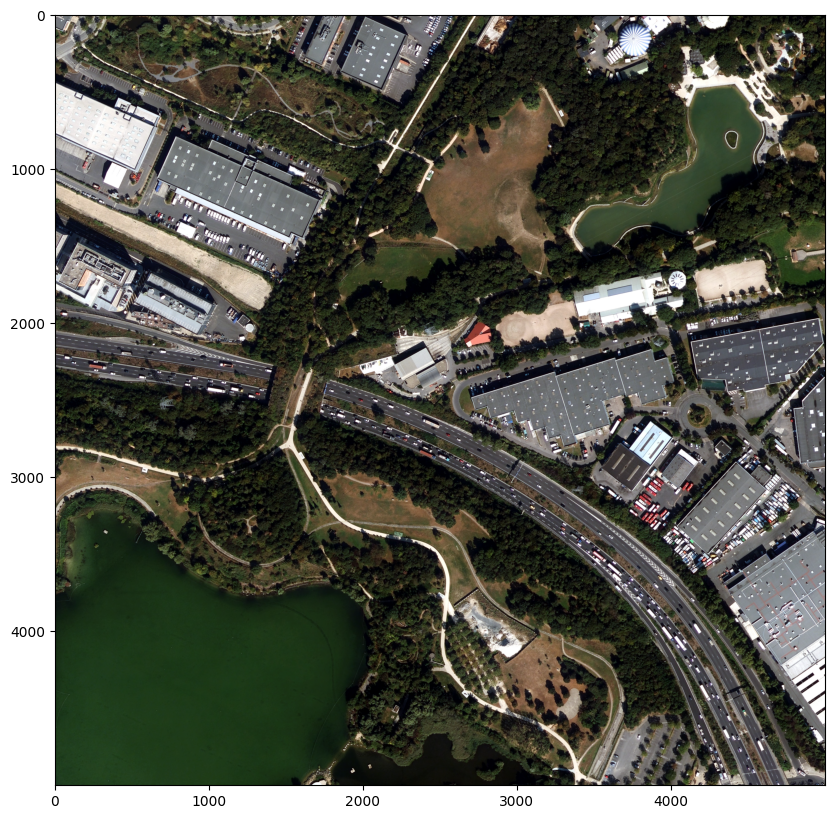

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(value)

In [ ]:
# Show the image with plotly
# fig = px.imshow(cv2.resize(value[...,[0,1,2]], (5000,5000)))
# fig.show()

# LidarHD

https://geoservices.ign.fr/lidarhd#telechargementclassifiees

## Check the area badge (documentation)
https://geoservices.ign.fr/sites/default/files/2023-10/DC_LiDAR_HD_1-0_PTS.pdf

## Access to the database
https://storage.sbg.cloud.ovh.net/v1/AUTH_63234f509d6048bca3c9fd7928720ca1/ppk-lidar/

## Unfortunately
Data not available for the 93 : https://osmose.numerique.gouv.fr/jcms/230861258_SocialQuestion/fr/ile-de-france-nuages-de-point-bruts-et-classes-toujours-indisponnibles

In [ ]:
def add0str(x, k):
    x = str(x)
    return f"{'0'*(k-len(x))}{x}"


def lambert_lidar(x, y):
    return add0str(int(x/1e3), k=4), add0str(int(y/1e3), k=4)

def linkAPILidar3D(x, y):
    x_lamb, y_lamb =lambert_lidar(x, y)
    return f"https://storage.sbg.cloud.ovh.net/v1/AUTH_63234f509d6048bca3c9fd7928720ca1/ppk-lidar/KE/LHD_FXX_{x_lamb}_{y_lamb}_PTS_C_LAMB93_IGN69.copc.laz"


# linkAPILidar3D(xrange[0], yrange[0])

In [ ]:
!pip install -q laspy
!pip install -q pylas
!pip install -q laszip
!pip install -q lazrs
!wget https://storage.sbg.cloud.ovh.net/v1/AUTH_63234f509d6048bca3c9fd7928720ca1/ppk-lidar/KD/LHD_FXX_0664_6894_PTS_C_LAMB93_IGN69.copc.laz

--2024-02-20 15:27:53--  https://storage.sbg.cloud.ovh.net/v1/AUTH_63234f509d6048bca3c9fd7928720ca1/ppk-lidar/KD/LHD_FXX_0664_6894_PTS_C_LAMB93_IGN69.copc.laz
Resolving storage.sbg.cloud.ovh.net (storage.sbg.cloud.ovh.net)... 54.38.230.76
Connecting to storage.sbg.cloud.ovh.net (storage.sbg.cloud.ovh.net)|54.38.230.76|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 115263808 (110M) [application/octet-stream]
Saving to: ‘LHD_FXX_0664_6894_PTS_C_LAMB93_IGN69.copc.laz.1’

LHD_FXX_0664_6894_P 100%[===================>] 109.92M  16.6MB/s    in 7.9s    

2024-02-20 15:28:02 (13.9 MB/s) - ‘LHD_FXX_0664_6894_PTS_C_LAMB93_IGN69.copc.laz.1’ saved [115263808/115263808]



In [ ]:
import laspy

# Remplacer 'votre_chemin_de_fichier' par le chemin réel vers votre fichier LAS/LAZ
fichier_las = 'LHD_FXX_0664_6894_PTS_C_LAMB93_IGN69.copc.laz'

# Ouvrir le fichier LAS/LAZ
las = laspy.read(fichier_las)

# Afficher quelques informations de base sur les données
print(f"Nombre de points : {len(las.points)}")
print(f"Formats des points : {las.point_format}")
print(f"En-têtes des dimensions disponibles : {las.point_format.dimension_names}")

Nombre de points : 17374711
Formats des points : <PointFormat(6, 0 bytes of extra dims)>
En-têtes des dimensions disponibles : <generator object PointFormat.dimension_names.<locals>.<genexpr> at 0x7f0a84d34040>


In [ ]:
las.xyz

array([[6.64531060e+05, 6.89300016e+06, 6.59200000e+01],
       [6.64531100e+05, 6.89300222e+06, 6.58700000e+01],
       [6.64530900e+05, 6.89300162e+06, 6.58700000e+01],
       ...,
       [6.64986670e+05, 6.89399179e+06, 6.53300000e+01],
       [6.64990950e+05, 6.89399361e+06, 6.98700000e+01],
       [6.64998860e+05, 6.89398928e+06, 6.17200000e+01]])

In [ ]:
las.x.min()

664000.0

In [ ]:
las.y.min()

6893000.0

In [ ]:
import plotly.graph_objects as go
import numpy as np
p = 2000000/len(las.points)
x = las.x[(las.x<las.x.min()+p*(las.x.max()-las.x.min())) & (las.y<las.y.min()+p*(las.y.max()-las.y.min()))].array
y = las.y[(las.x<las.x.min()+p*(las.x.max()-las.x.min())) & (las.y<las.y.min()+p*(las.y.max()-las.y.min()))].array
z = las.z[(las.x<las.x.min()+p*(las.x.max()-las.x.min())) & (las.y<las.y.min()+p*(las.y.max()-las.y.min()))].array

fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
     marker=dict(
        size=1,
        opacity=0.8
    ))])
fig.show()

This cell output is too large and can only be displayed while logged in.


## Area in google maps
https://www.google.com/maps/@49.1362903,2.5079675,190m/data=!3m1!1e3?entry=ttu

# BDTopo

 https://geoservices.ign.fr/bdtopo

 https://geoservices.ign.fr/documentation/donnees/vecteur/bdtopo

In [ ]:
%%time

paths_shp =  glob.glob(r'BDTOPO/1_DONNEES_LIVRAISON_2021-03-00272/BDT_3-0_SHP_LAMB93_D093-ED2021-03-15/BATI/BATIMENT.shp')

# paths_shp =  glob.glob(r'BDTOPO/*/*/*/*.shp')

def load_shp(path):
    # Load data
    bdtopo = gpd.read_file(path)
    # Add Category and Type
    bdtopo.insert(0, 'Category', path.split('/')[-2])
    # With Windows
    # bdtopo.insert(0, 'Category', path.split('\\')[-2])
    bdtopo.insert(1, 'Type', path.split('/')[-1][:-4])
    # With Windows
    # bdtopo.insert(1, 'Type', path.split('\\')[-1][:-4])
    return bdtopo

bdtopo = load_shp(paths_shp[0])

# for path in paths_shp[1:]:
#     bdtopo = pd.concat([bdtopo,load_shp(path)])

# bdtopo.reset_index(drop=True, inplace=True)
bdtopo

CPU times: user 7min 42s, sys: 7.1 s, total: 7min 49s
Wall time: 8min 1s


,Category,Type,ID,NATURE,USAGE1,USAGE2,LEGER,ETAT,DATE_CREAT,DATE_MAJ,...,MAT_MURS,MAT_TOITS,HAUTEUR,Z_MIN_SOL,Z_MIN_TOIT,Z_MAX_TOIT,Z_MAX_SOL,ORIGIN_BAT,APP_FF,geometry
0,BATI,BATIMENT,BATIMENT0000002203252795,Indifférenciée,Indifférencié,None,Non,En service,2019-07-01 10:40:31,None,...,None,None,NaN,NaN,NaN,NaN,NaN,Imagerie aérienne,None,"POLYGON Z ((663739.900 6869421.400 -1000.000, ..."
1,BATI,BATIMENT,BATIMENT0000000245492229,Indifférenciée,Résidentiel,Annexe,Non,En service,2010-11-25 12:44:09,2019-07-01 10:40:31,...,50,10,4.9,54.0,58.9,NaN,NaN,Cadastre,C 0.6,"POLYGON Z ((663956.500 6869331.200 58.900, 663..."
2,BATI,BATIMENT,BATIMENT0000000245492255,Indifférenciée,Annexe,None,Non,En service,2010-11-25 12:44:09,2019-07-01 10:40:31,...,None,None,3.1,54.0,57.1,NaN,NaN,Cadastre,C 0.3,"POLYGON Z ((663973.800 6869320.400 57.100, 663..."
3,BATI,BATIMENT,BATIMENT0000000245493265,Indifférenciée,Résidentiel,None,Non,En service,2010-11-25 12:44:09,2019-07-01 10:40:31,...,40,20,9.8,50.7,60.5,NaN,NaN,Cadastre,A 1.0,"POLYGON Z ((663621.100 6869064.700 60.500, 663..."
4,BATI,BATIMENT,BATIMENT0000000245491936,Indifférenciée,Résidentiel,None,Non,En service,2010-11-25 12:44:09,2019-07-01 10:40:31,...,40,10,8.0,53.0,61.0,NaN,NaN,Cadastre,A 1.0,"POLYGON Z ((663716.800 6869013.200 61.000, 663..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846212,BATI,BATIMENT,BATIMENT0000002223412165,Indifférenciée,Résidentiel,Annexe,Non,En service,2021-03-18 17:15:05,None,...,None,None,NaN,NaN,NaN,NaN,NaN,Cadastre,None,"POLYGON Z ((649424.600 6867137.000 -1000.000, ..."
846213,BATI,BATIMENT,BATIMENT0000002223412166,Indifférenciée,Résidentiel,Annexe,Non,En service,2021-03-18 17:15:05,None,...,None,None,NaN,NaN,NaN,NaN,NaN,Cadastre,None,"POLYGON Z ((649398.600 6867113.500 -1000.000, ..."
846214,BATI,BATIMENT,BATIMENT0000002223412167,Indifférenciée,Commercial et services,None,Non,En service,2021-03-18 17:15:05,None,...,None,None,NaN,NaN,NaN,NaN,NaN,Cadastre,None,"POLYGON Z ((649506.800 6867075.700 -1000.000, ..."
846215,BATI,BATIMENT,BATIMENT0000002223412168,Indifférenciée,Résidentiel,None,Non,En construction,2021-03-18 17:15:05,None,...,None,None,NaN,NaN,NaN,NaN,NaN,Autre,None,"POLYGON Z ((649566.700 6866839.600 -1000.000, ..."


> It's maybe preferable to save and load with joblib or pickle to gain some time

## Str info for an object

In [ ]:
print(bdtopo['geometry'][0])
print(bdtopo['geometry'][0].wkt)
print(type(bdtopo['geometry'][0].wkt))

POLYGON Z ((663739.9 6869421.4 -1000, 663743.2 6869413.7 -1000, 663738.4 6869412.5 -1000, 663738.8 6869420.6 -1000, 663739.9 6869421.4 -1000))
POLYGON Z ((663739.9 6869421.4 -1000, 663743.2 6869413.7 -1000, 663738.4 6869412.5 -1000, 663738.8 6869420.6 -1000, 663739.9 6869421.4 -1000))
<class 'str'>


In [ ]:
bdtopo.groupby(['Category','Type']).agg( count=('Type','count'), geometry=("geometry", 'first'))

,,count,geometry
Category,Type,,
BATI,BATIMENT,846217,"POLYGON Z ((663739.900 6869421.400 -1000.000, ..."


<Axes: >

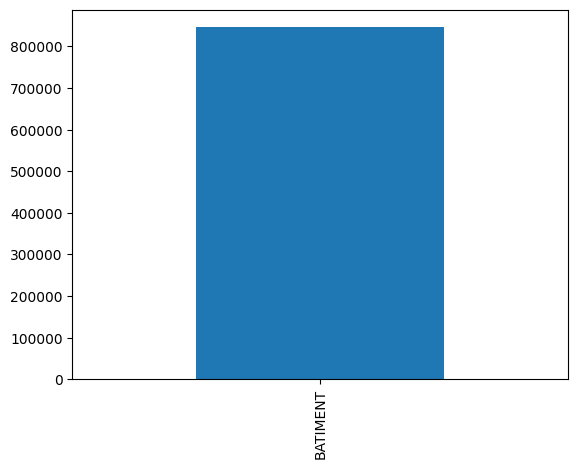

In [ ]:
bdtopo.Type.value_counts().plot.bar()

## Find all the polygon and point of the selected area

In [ ]:
import geopandas as gpd


map_size = [5000,5000]


def isInMap(xrange, yrange):
    def my_function(polynom):
        x, y = polynom.centroid.x, polynom.centroid.y
        if xrange[0]<x and xrange[1]>x and yrange[0]<y and yrange[1]>y:
            return True
        else :
            return False

    return my_function




def convert_centroid(map_size, xrange, yrange):
    def my_function(polygon):
        x, y = polygon.centroid.x, polygon.centroid.y
        x_new = (x - xrange[0])/(xrange[1]-xrange[0])*map_size[0]
        y_new = map_size[1] - (y - yrange[0])/(yrange[1]-yrange[0])*map_size[1]
        return [x_new, y_new]

    return my_function


def convert_polygon(map_size, xrange, yrange):
    def my_function(polygon):
        if polygon.wkt.lower()[:7]=="polygon":
            x, y = polygon.exterior.coords.xy
            x = x.tolist()
            y = y.tolist()
        elif polygon.wkt[:10]=="LINESTRING":
            x, y = polygon.coords.xy
            x = x.tolist()
            x += x[::-1]
            y = y.tolist()
            y += y[::-1]

        else :
            x = [1,2]
            y = [1,2]
        x = np.array(x)
        y = np.array(y)
        x_new = (x - xrange[0])/(xrange[1]-xrange[0])*map_size[0]
        y_new = map_size[1] - (y - yrange[0])/(yrange[1]-yrange[0])*map_size[1]
        return [x_new, y_new]

    return my_function

def generate_xy_polygons(bdtopo_area):

    list_x = []
    for xpoly in bdtopo_area['xpolygon']:
        list_x.extend(xpoly.tolist() + [None])
    list_x = list_x[:-1]

    list_y = []
    for ypoly in bdtopo_area['ypolygon']:
        ypoly = map_size[1]-ypoly
        list_y.extend(ypoly.tolist() + [None])
    list_y = list_y[:-1]

    return list_x, list_y

def generate_x_polygons(xdata):
    list_x = []
    for xpoly in xdata:
        list_x.extend(xpoly.tolist() + [None])
    list_x = list_x[:-1]

    return list_x


bdtopo_zone = bdtopo[bdtopo['geometry'].apply(isInMap(xrange, yrange))].copy()
print('Before :', bdtopo.shape, 'After :', bdtopo_zone.shape)

bdtopo_zone['centroid'] = bdtopo_zone['geometry'].apply(convert_centroid(map_size, xrange, yrange))
bdtopo_zone['xcentroid'] = bdtopo_zone['centroid'].apply(lambda x : x[0])
bdtopo_zone['ycentroid'] = bdtopo_zone['centroid'].apply(lambda x : x[1])


bdtopo_point = bdtopo_zone[bdtopo['geometry'].apply(lambda x : x.wkt.lower()[:5]=="point")]

bdtopo_zone = bdtopo_zone[bdtopo_zone['geometry'].apply(lambda x : x.wkt.lower()[:7]=="polygon" or x.wkt[:10]=="LINESTRING")]


bdtopo_zone['polygon'] = bdtopo_zone['geometry'].apply(convert_polygon(map_size, xrange, yrange))
bdtopo_zone['xpolygon'] = bdtopo_zone['polygon'].apply(lambda x : x[0])
bdtopo_zone['ypolygon'] = bdtopo_zone['polygon'].apply(lambda x : x[1])

bdtopo_zone.head()

Before : (846217, 28) After : (1278, 28)


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1475: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


,Category,Type,ID,NATURE,USAGE1,USAGE2,LEGER,ETAT,DATE_CREAT,DATE_MAJ,...,Z_MAX_SOL,ORIGIN_BAT,APP_FF,geometry,centroid,xcentroid,ycentroid,polygon,xpolygon,ypolygon
5019,BATI,BATIMENT,BATIMENT0000000229484399,Indifférenciée,Résidentiel,None,Non,En service,2010-02-22 17:57:30,2019-01-11 20:48:47,...,NaN,Imagerie aérienne,None,"POLYGON Z ((662976.900 6864169.800 109.100, 66...","[4879.758397932941, 3887.368217067172]",4879.758398,3887.368217,"[[4846.0000000001555, 4876.0000000001555, 4913...","[4846.0000000001555, 4876.0000000001555, 4913....","[3868.0000000012415, 3848.6666666654246, 3907...."
5022,BATI,BATIMENT,BATIMENT0000000229484346,Indifférenciée,Résidentiel,None,Non,En service,2010-02-22 17:57:30,2019-01-11 20:48:47,...,NaN,Imagerie aérienne,None,"POLYGON Z ((662851.300 6864052.400 112.300, 66...","[4046.7181503322595, 4688.048488243173]",4046.718150,4688.048488,"[[4008.6666666669776, 4042.666666666822, 4084....","[4008.6666666669776, 4042.666666666822, 4084.6...","[4650.666666664183, 4634.666666667908, 4728.00..."
5030,BATI,BATIMENT,BATIMENT0000000229485253,Indifférenciée,Sportif,None,Non,En service,2010-02-22 17:57:30,2014-04-07 19:28:28,...,NaN,Imagerie aérienne,None,"POLYGON Z ((662895.900 6864441.000 82.800, 662...","[4284.984772883666, 1922.9956208604076]",4284.984773,1922.995621,"[[4306.0000000001555, 4171.333333333023, 4230....","[4306.0000000001555, 4171.333333333023, 4230.6...","[2060.0, 1857.33333333085, 1819.3333333358169,..."
76872,BATI,BATIMENT,BATIMENT0000000313021339,"Industriel, agricole ou commercial",Indifférencié,None,Non,En service,2012-09-14 13:48:16,None,...,NaN,Cadastre,None,"POLYGON Z ((662262.200 6864009.900 74.500, 662...","[94.19789662662272, 4948.861185926944]",94.197897,4948.861186,"[[81.33333333302289, 158.66666666697714, 217.3...","[81.33333333302289, 158.66666666697714, 217.33...","[4933.999999997516, 4912.66666666915, 4896.666..."
77093,BATI,BATIMENT,BATIMENT0000000002703543,"Industriel, agricole ou commercial",Indifférencié,None,Non,En service,2006-05-22 16:31:28,2012-09-14 13:54:53,...,NaN,Imagerie aérienne,None,"POLYGON Z ((662300.200 6864395.900 72.600, 662...","[382.7554756139095, 2283.346916815887]",382.755476,2283.346917,"[[334.6666666663562, 325.33333333364374, 322.6...","[334.6666666663562, 325.33333333364374, 322.66...","[2360.6666666641827, 2361.333333334575, 2354.6..."


## Prepare the data for plolty map

In [ ]:
bdtopo_zone_agregate = bdtopo_zone.groupby('Type').agg({'xpolygon':list, 'ypolygon':list})

bdtopo_zone_agregate['xpolygon_ready'] = bdtopo_zone_agregate['xpolygon'].apply(generate_x_polygons)
bdtopo_zone_agregate['ypolygon_ready'] = bdtopo_zone_agregate['ypolygon'].apply(generate_x_polygons)
bdtopo_zone_agregate

,xpolygon,ypolygon,xpolygon_ready,ypolygon_ready
Type,,,,
BATIMENT,"[[4846.0000000001555, 4876.0000000001555, 4913...","[[3868.0000000012415, 3848.6666666654246, 3907...","[4846.0000000001555, 4876.0000000001555, 4913....","[3868.0000000012415, 3848.6666666654246, 3907...."


In [ ]:
bdtopo_point_agregate = bdtopo_point.groupby('Type').agg({'xcentroid':list, 'ycentroid':list})

bdtopo_point_agregate

,xcentroid,ycentroid
Type,,


In [ ]:
def show_map(value, scatters_data, scatters_list_name, points_data, points_list_name):
    image = px.imshow(cv2.resize(value, (5000,5000)))

    points = []

    for i, (list_x, list_y) in enumerate(scatters_data):
        # Ajouter des points
        point = go.Scatter(
            x=list_x,
            y=list_y,
            fill="toself",
            name=scatters_list_name[i],
        #     fillcolor="blue"

        )
        points.append(point)

    for i, (list_x, list_y) in enumerate(points_data):
        # Ajouter des points
        point = go.Scatter(
            x=list_x,
            y=list_y,
            mode='markers',
            marker=dict( size=5),
            name=points_list_name[i]
        )
        points.append(point)

    # Créer la figure
    fig = go.Figure(data=[image.data[0]]+points)

    fig.update_xaxes(range=[0,5000])
    fig.update_yaxes(range=[0,5000])

    fig.update_layout(
        autosize=False,
        width=1000,
        height=800,)

    # Afficher la figure
    fig.show()


# Need a lot of memory to load the interactive map
# show_map(value, bdtopo_zone_agregate[['xpolygon_ready', 'ypolygon_ready']].values, bdtopo_zone_agregate.index, bdtopo_point_agregate[['xcentroid', 'ycentroid']].values, bdtopo_point_agregate.index)

## Generate the mask of building

In [ ]:
data_mask = [list(zip(bdtopo_zone_agregate['xpolygon']['BATIMENT'][i], bdtopo_zone_agregate['ypolygon']['BATIMENT'][i])) for i in range(len(bdtopo_zone_agregate['xpolygon']['BATIMENT'])) ]

In [ ]:
import numpy
from PIL import Image, ImageDraw
width, height = 5000,5000
# polygon = [(x1,y1),(x2,y2),...] or [x1,y1,x2,y2,...]

img = Image.new('L', (width, height), 0)
for p in data_mask :
    ImageDraw.Draw(img).polygon(p, outline=1, fill=1)

mask = numpy.array(img)

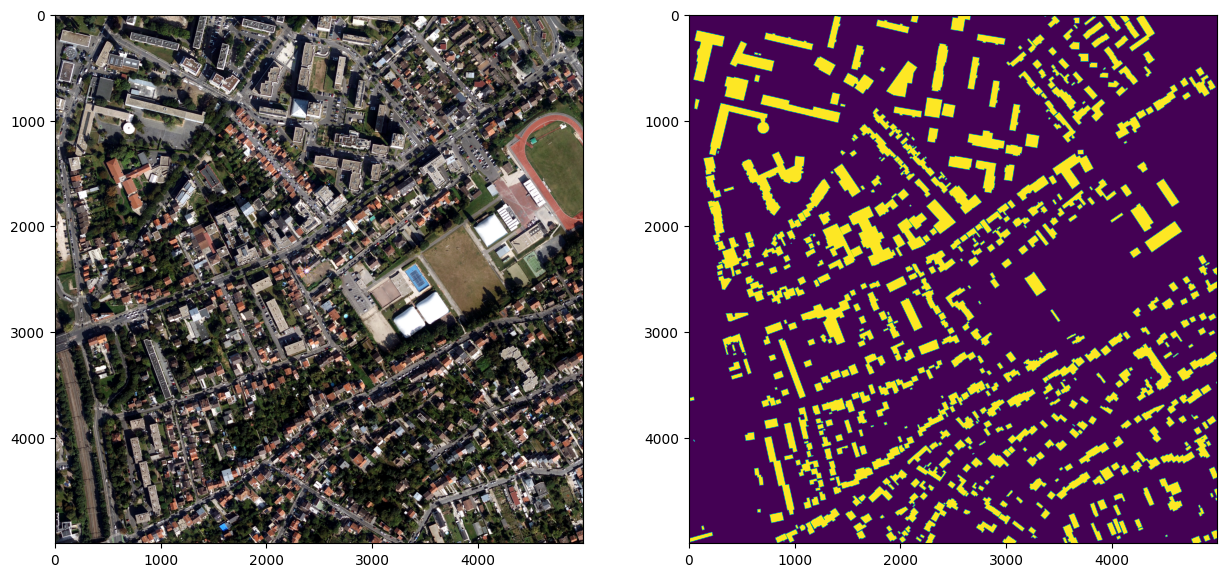

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.imshow(cv2.resize(value, (5000,5000)))
plt.subplot(122)
plt.imshow(cv2.resize(mask, (5000,5000)))

## Spliting into sub image

In [ ]:
def split2tile(satellite, mask, tile_size=(500,500), padding_size=(500,500)):

    height, width = mask.shape

    tiles_satellite = []
    tiles_mask = []

    # Calcul du nombre de tuiles dans chaque direction
    num_tiles_y = int((height-tile_size[0])/padding_size[0])
    num_tiles_x = int((width-tile_size[1])/padding_size[1])

    for y in np.linspace(0,height-tile_size[0], num_tiles_y, dtype=int):
        for x in np.linspace(0,width-tile_size[1], num_tiles_x, dtype=int):
            tiles_satellite.append(satellite[y:y+tile_size[0], x:x+tile_size[1]])
            tiles_mask.append(mask[y:y+tile_size[0], x:x+tile_size[1]])

    return tiles_satellite, tiles_mask

tiles_satellite, tiles_mask =  split2tile(value, mask)

In [ ]:
len(tiles_satellite)

81

## Showing some random subimage with the associate mask

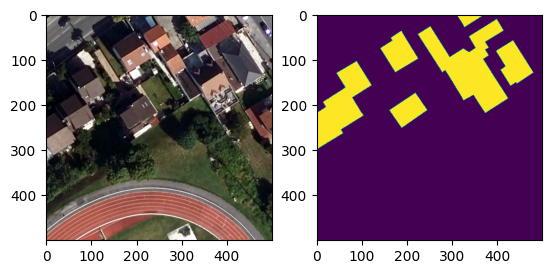

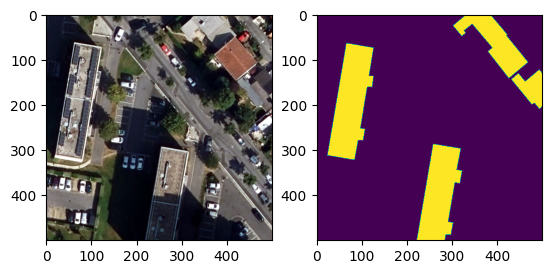

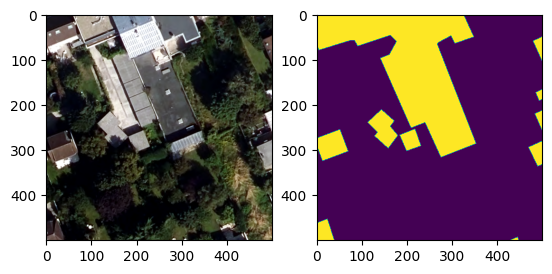

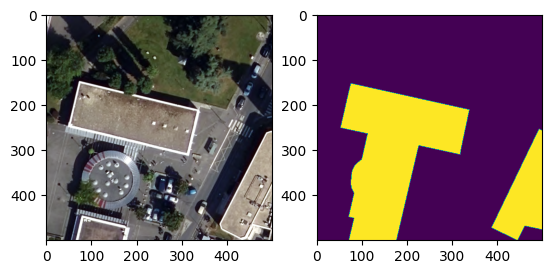

In [ ]:
def plot_im_mask(im, mask):
    plt.subplot(121)
    plt.imshow(im)
    plt.subplot(122)
    plt.imshow(mask)
    plt.show()

for i in np.random.uniform(0, len(tiles_satellite), 4):
    plot_im_mask(tiles_satellite[int(i)], tiles_mask[int(i)])